In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
np.random.seed(42)
data = pd.DataFrame({
    'Recency': np.random.randint(1, 100, 200),
    'Frequency': np.random.randint(1, 20, 200),
    'Monetary': np.random.uniform(10, 1000, 200),
    'Category_Preference': np.random.randint(1, 6, 200),  # 5 categories
    'Average_Session_Time': np.random.uniform(1, 60, 200)
})

In [32]:
data.fillna(data.mean(numeric_only=True),inplace=True)
print(data)

     Recency  Frequency    Monetary  Category_Preference  Average_Session_Time
0         52          5  447.928707                    1              1.312700
1         93          1  247.389486                    3             58.528963
2         15         19  102.934557                    5             29.954178
3         72         10  191.037337                    2             43.650870
4         61         12  935.267857                    1             49.430827
..       ...        ...         ...                  ...                   ...
195       70          5  556.071994                    2             58.756955
196       72          9  173.185919                    4             50.547543
197       27         12  417.142565                    4             52.152632
198        9          1  779.826261                    3             25.071085
199       62          1  485.566381                    4             33.551633

[200 rows x 5 columns]


In [33]:
data.head()

,Recency,Frequency,Monetary,Category_Preference,Average_Session_Time
0,52,5,447.928707,1,1.312700
1,93,1,247.389486,3,58.528963
2,15,19,102.934557,5,29.954178
3,72,10,191.037337,2,43.650870
4,61,12,935.267857,1,49.430827


In [24]:
data.describe()

,Recency,Frequency,Monetary,Category_Preference,Average_Session_Time
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,49.365000,9.450000,508.962607,2.920000,31.407640
std,29.390488,6.024031,282.829078,1.433133,16.041248
min,1.000000,1.000000,25.151495,1.000000,1.159943
25%,24.000000,4.000000,265.799111,2.000000,18.594278
50%,51.000000,9.000000,501.336329,3.000000,32.456244
75%,75.000000,16.000000,739.681326,4.000000,45.079276
max,99.000000,19.000000,995.971930,5.000000,59.863864


In [35]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean

,Recency,Frequency,Monetary,Category_Preference,Average_Session_Time
0,52,5,447.928707,1,1.312700
1,93,1,247.389486,3,58.528963
2,15,19,102.934557,5,29.954178
3,72,10,191.037337,2,43.650870
4,61,12,935.267857,1,49.430827
...,...,...,...,...,...
195,70,5,556.071994,2,58.756955
196,72,9,173.185919,4,50.547543
197,27,12,417.142565,4,52.152632
198,9,1,779.826261,3,25.071085


In [8]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

In [9]:
data_scaled

array([[ 8.98798385e-02, -7.40561791e-01, -2.16339352e-01,
        -1.34308433e+00, -1.88080508e+00],
       [ 1.48838966e+00, -1.40623531e+00, -9.27166044e-01,
         5.59618470e-02,  1.69496677e+00],
       [-1.17219000e+00,  1.58929553e+00, -1.43919765e+00,
         1.45500802e+00, -9.08351404e-02],
       [ 7.72079751e-01,  9.15301090e-02, -1.12691057e+00,
        -6.43561241e-01,  7.65149554e-01],
       [ 3.96869799e-01,  4.24366869e-01,  1.51107174e+00,
        -1.34308433e+00,  1.12637218e+00],
       [-9.67530026e-01,  9.23622009e-01,  4.71163878e-01,
         5.59618470e-02,  7.48782503e-01],
       [ 1.14728970e+00, -7.48882710e-02,  4.45435899e-02,
         5.59618470e-02,  7.24655177e-02],
       [ 1.28372969e+00,  1.25645877e+00,  5.37278486e-01,
        -1.34308433e+00, -1.42933353e-01],
       [ 8.74409738e-01,  1.25645877e+00, -2.39778000e-01,
         1.45500802e+00,  1.19171421e+00],
       [ 8.74409738e-01,  4.24366869e-01,  7.93192359e-01,
        -1.34308433e+00

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available thread

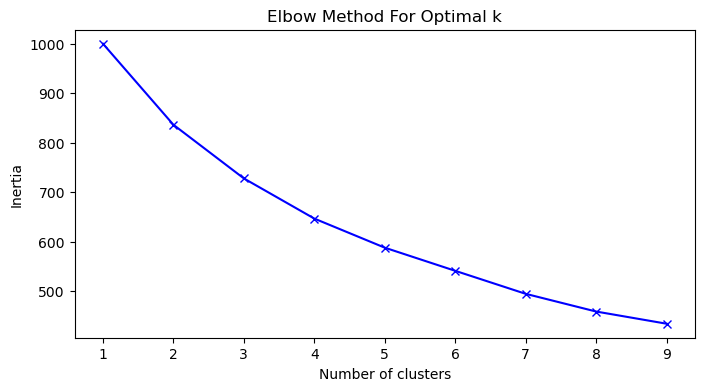

In [10]:
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(data_scaled)
data_clean['Cluster'] = clusters

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
clusters

array([1, 3, 0, 2, 2, 2, 3, 2, 0, 1, 3, 3, 0, 2, 0, 0, 2, 0, 3, 0, 0, 3,
       1, 0, 3, 2, 0, 3, 1, 2, 1, 1, 3, 3, 3, 2, 2, 3, 1, 3, 2, 1, 1, 0,
       3, 1, 2, 3, 3, 0, 2, 2, 0, 0, 2, 2, 3, 0, 1, 2, 2, 2, 3, 0, 2, 0,
       1, 3, 1, 1, 0, 2, 0, 0, 0, 1, 3, 2, 2, 3, 3, 0, 3, 0, 1, 1, 2, 0,
       3, 1, 2, 1, 1, 3, 3, 3, 0, 0, 0, 1, 0, 2, 3, 0, 3, 3, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 3, 0, 2, 2, 3, 0, 2, 2, 2, 1, 1, 0, 2, 3, 0, 2, 1,
       1, 3, 1, 2, 1, 3, 0, 2, 1, 2, 3, 1, 0, 0, 3, 0, 0, 0, 2, 1, 3, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1,
       3, 0, 2, 2, 0, 3, 0, 0, 2, 2, 3, 1, 0, 1, 2, 1, 2, 0, 2, 3, 0, 0,
       1, 3], dtype=int32)

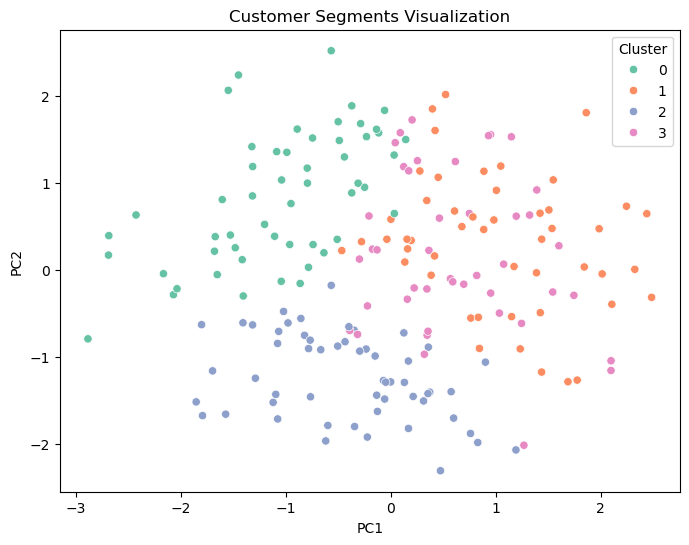

In [17]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data_clean['PC1'] = principal_components[:, 0]
data_clean['PC2'] = principal_components[:, 1]
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data_clean, palette='Set2')
plt.title('Customer Segments Visualization')
plt.show()

In [18]:
segment_summary = data_clean.groupby('Cluster').mean()
print("Segment Profiles:\n", segment_summary)

Segment Profiles:
            Recency  Frequency    Monetary  Category_Preference  \
Cluster                                                          
0        28.849057   9.566038  276.791639             4.075472   
1        59.183673   7.591837  668.039948             2.877551   
2        46.800000  14.763636  493.004172             1.636364   
3        66.744186   4.627907  634.264599             3.186047   

         Average_Session_Time       PC1       PC2  
Cluster                                            
0                   31.825490 -1.045620  0.837497  
1                   13.939471  1.030077  0.317946  
2                   37.042635 -0.408095 -1.230807  
3                   43.590650  0.636961  0.179714  


In [19]:
for cluster_id, row in segment_summary.iterrows():
    print(f"\nCluster {cluster_id} characteristics:")
    print(f"- Average Recency: {row['Recency']:.2f} days")
    print(f"- Average Frequency: {row['Frequency']:.2f} purchases")
    print(f"- Average Monetary: ${row['Monetary']:.2f}")
    print(f"- Preferred Category: {int(round(row['Category_Preference']))}")
    print(f"- Average Session Time: {row['Average_Session_Time']:.2f} minutes")
    
    if row['Frequency'] > 10 and row['Monetary'] > 500:
        print("Recommendation: Target with loyalty programs and premium offers.")
    elif row['Recency'] > 50:
        print("Recommendation: Re-engagement campaigns with discounts.")
    else:
        print("Recommendation: Personalized product recommendations based on preferences.")



Cluster 0 characteristics:
- Average Recency: 28.85 days
- Average Frequency: 9.57 purchases
- Average Monetary: $276.79
- Preferred Category: 4
- Average Session Time: 31.83 minutes
Recommendation: Personalized product recommendations based on preferences.

Cluster 1 characteristics:
- Average Recency: 59.18 days
- Average Frequency: 7.59 purchases
- Average Monetary: $668.04
- Preferred Category: 3
- Average Session Time: 13.94 minutes
Recommendation: Re-engagement campaigns with discounts.

Cluster 2 characteristics:
- Average Recency: 46.80 days
- Average Frequency: 14.76 purchases
- Average Monetary: $493.00
- Preferred Category: 2
- Average Session Time: 37.04 minutes
Recommendation: Personalized product recommendations based on preferences.

Cluster 3 characteristics:
- Average Recency: 66.74 days
- Average Frequency: 4.63 purchases
- Average Monetary: $634.26
- Preferred Category: 3
- Average Session Time: 43.59 minutes
Recommendation: Re-engagement campaigns with discounts.
